In [2]:
import pandas as pd
import numpy as np
import feather


In [8]:
tr_cate = train[cate_score]
te_cate =test[cate_score]

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Columns: 3807 entries, ID to col3805
dtypes: float64(2341), int64(1466)
memory usage: 398.8 MB


In [54]:
train = feather.read_dataframe("../data/input/train.feather")
test = feather.read_dataframe("../data/input/test.feather")

In [56]:

import json
import numpy as np
with open('../configs/Kbest_FE.json') as f:
    df = json.load(f)
fl_score = np.array(df["kbest_feature"]["float"])
int_score = np.array(df["kbest_feature"]["int"])
cate_score = np.array(df["kbest_feature"]["cate"])

In [4]:
score = train["Score"]
del train["index"],test["index"],train["Score"]

In [5]:
data = train.append(test)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
num_tr = train[np.r_[int_score,fl_score]]

In [13]:
num_te = test[np.r_[int_score,fl_score]]

In [6]:
tr_int = train[int_score]
te_int = test[int_score]
tr_fl = train[fl_score]
te_fl = test[fl_score]

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def standard(train,test):
    #stdsc = StandardScaler()
    stdsc = MinMaxScaler()
    std_tr = stdsc.fit_transform(train)
    std_te = stdsc.transform(test)
    return np.r_[std_tr,std_te]
fl_data = standard(tr_fl,te_fl)

In [119]:
int_data = standard(tr_int,te_int)

In [294]:
from tqdm import tqdm

def histgram_FE(data,dtypes):
    bins = 100
    new_arr = np.zeros((data.shape[0],bins))

    for i in tqdm(range(len(data))):
        tmp = data[i,:]
        tmp = np.histogram(tmp,bins=bins)[0]  
        new_arr[i,:] = tmp
    col = [f"{dtypes}_histgram_{i}" for i in range(bins)]
    new = pd.DataFrame(new_arr,columns=col)

    return new
hist_fl = histgram_FE(fl_data,"float")

100%|██████████| 27463/27463 [00:05<00:00, 4737.82it/s]


In [295]:
hist_int = histgram_FE(int_data,"int")

100%|██████████| 27463/27463 [00:05<00:00, 5161.75it/s]


In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def density_FE(data,dtyps):
    new_arr = np.zeros((data.shape[0],64))
    for i in tqdm(range(len(data))):
        tmp = data[i,:]
        kde_model = sm.nonparametric.KDEUnivariate(tmp)
        kde_model.fit(fft = True,adjust=0.2,gridsize=50)#,clip = [0,20])
        new_arr[i,:] = kde_model.density
    col = [f"{dtyps}_density_{i}" for i in range(64)]
    new = pd.DataFrame(new_arr,columns=col)
    return new
dens_int = density_FE(int_data[:],"int")

NameError: name 'int_data' is not defined

In [246]:
dens_fl = density_FE(fl_data,"float")

100%|██████████| 27463/27463 [00:21<00:00, 1284.24it/s]


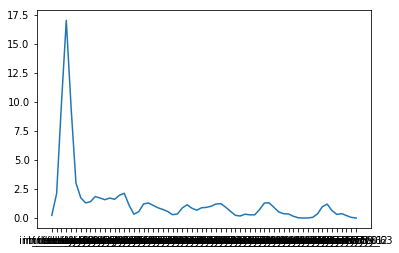

In [244]:
for i in range(1):
    plt.plot(dens_int.iloc[i])

In [8]:
def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]
    return pd.DataFrame(add_df,columns=add_columns)

In [325]:
data = df_concat([hist_int,np.round(dens_int,4),hist_fl,np.round(dens_fl,4)])

In [83]:
i = 27463//2
tr,te = data1.iloc[:i,:],data1.iloc[i:,:]
tr["Score"] = score

tr.reset_index(inplace = True)
te.reset_index(inplace = True)
tr.to_feather("../data/input/tr_stack.feather")
te.to_feather("../data/input/te_stack.feather")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [328]:
tr_lda = feather.read_dataframe("../features/l_d_a_feature_train.feather")
te_lda = feather.read_dataframe("../features/l_d_a_feature_test.feather")

In [290]:
all_st = feather.read_dataframe("../features/add_Alltype.feather")
tr_pca = feather.read_dataframe("../data/input/tr_best_pca__.feather")
te_pca = feather.read_dataframe("../data/input/te_best_pca__.feather")

In [359]:
FE_f = feather.read_dataframe("../features/add_float.feather")
FE_i = feather.read_dataframe("../features/add_int.feather")
FE_c = feather.read_dataframe("../features/add_cate.feather")

In [291]:
pca = ['n_PCA_1', 'n_PCA_2',
       'n_PCA_3', 'n_PCA_4', 'n_PCA_5', 'n_PCA_6', 'n_PCA_7', 'n_PCA_8',
       'n_PCA_9', 'n_PCA_10', 'n_PCA_11', 'n_PCA_12', 'n_PCA_13',
       'n_PCA_14', 'n_PCA_15', 'n_PCA_16', 'n_PCA_17', 'n_PCA_18',
       'n_PCA_19', 'n_PCA_20']

In [292]:
tr_pca = tr_pca[pca]
te_pca = te_pca[pca]

In [293]:
pca_n = tr_pca.append(te_pca)

In [46]:
data1 = df_concat([pca_p_fl,pca_p_int,data])

In [394]:
data1 = df_concat([data,st])

In [282]:
fe_i = FE_i.iloc[:,:100]
fe_f = FE_f.iloc[:,:100]

In [289]:
FE_c= feather.read_dataframe("../features/add_cate.feather")

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#num_data =  df_concat([hist_int,np.round(dens_int,4),hist_fl,np.round(dens_fl,4)])
#num_data = df_concat([fl_data, FE_f,])
#num_data = df_concat([int_data, FE_i,])
#num_data = df_concat([cate_data, FE_c,FE10_c])

#stdsc = StandardScaler()
#tr,te =num_data.iloc[:13731,:],num_data.iloc[13731:,:]
#tr,te = tr_lda,te_lda
#tr_std= stdsc.fit_transform(tr)
# 訓練用データを基準にテストデータも標準化
#te_std = stdsc.transform(te)

def PCA_feature(X_train,X_test):

    n_components = 60
    pca = PCA(n_components=n_components)
    x_train_projected = pca.fit_transform(X_train)
    x_test_projected = pca.transform(X_test)
    new1 = pd.DataFrame()
    new2 = pd.DataFrame()
    for npca in range(0, n_components):
        new1['PCA_'+str(npca+1)] = x_train_projected[:, npca]
        new2['PCA_'+str(npca+1)] = x_test_projected[:, npca]
    new = new1.append(new2)
    return new1,new2
#tr_f,te_f = np.log1p(frq).iloc[:13731,:],np.log1p(frq).iloc[13731:,:]
pca_cate1,pca_cate2 = PCA_feature(tr_catef,te_catef)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


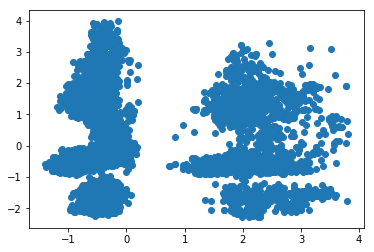

In [69]:
plt.scatter(pca_cate1.iloc[:,0],pca_cate1.iloc[:,1])

In [13]:
train.shape

(13731, 485)

0.7460676531456736

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


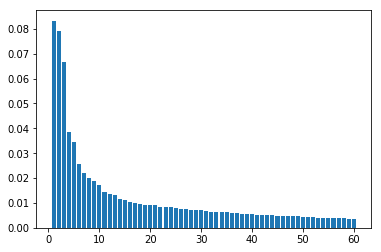

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
pca.fit(tr_catef)
import matplotlib.pyplot as plt
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
pca.explained_variance_ratio_.sum()

In [63]:
data = standard(train,test)

NameError: name 'standard' is not defined

In [361]:
data = np.log1p(data)

In [365]:
data = pd.DataFrame(data,columns=train.columns)

In [6]:
encoding = train.groupby("col88").size()

In [8]:
encoding = encoding/len(train)
a = train["col88"].map(encoding)

In [59]:
def freq_encoing(data):
    new = pd.DataFrame()
    l = len(data)
    for i in data.columns:
        tmp = data.groupby(i).size()
        tmp = tmp/l
        new[f"{i}_FreqEnc"] = data[i].map(tmp)
        
    return new
tr_cate =cate_tr
tr_catef = freq_encoing(tr_cate)

In [60]:

te_cate =cate_te
te_catef = freq_encoing(te_cate)

In [240]:
te_intf = freq_encoing(te_int)

In [243]:
tr_flf = freq_encoing(tr_fl)

In [244]:
freq_cate = tr_catef.append(te_catef)

In [245]:
freq_int= tr_intf.append(te_intf)

In [246]:
freq_fl= tr_flf.append(te_flf)

In [28]:
data1 = df_concat([data,p_fl,p_int])

In [267]:
tr_freq = df_concat([tr_flf,tr_catef,tr_intf])
te_freq = df_concat([te_flf,te_catef,te_intf])

In [227]:
int_fre1 = freq_encoing(te_int)

In [78]:
for i in data.columns:
    u = sorted(data[i].unique())
    dic = {a:b for a,b in zip(list(range(0,max(u))))}
tr_int

,col70,col88,col142,col153,col161,col162,col195,col286,col458,col463,...,col3640,col3684,col3723,col3727,col3741,col3751,col3769,col3775,col3797,col3805
0,2.0,21.0,23.0,4.0,0.0,0.0,2.0,6.0,0.0,0.0,...,197.0,0.0,0.0,18.0,0.0,49.0,4.0,14.0,0.0,0.0
1,1.0,30.0,14.0,4.0,0.0,0.0,1.0,8.0,3.0,0.0,...,189.0,0.0,1.0,13.0,0.0,44.0,3.0,7.0,0.0,3.0
2,0.0,-19.0,14.0,1.0,6.0,0.0,2.0,10.0,0.0,12.0,...,168.0,0.0,0.0,6.0,0.0,40.0,1.0,6.0,0.0,0.0
3,0.0,7.0,14.0,2.0,2.0,0.0,0.0,6.0,0.0,0.0,...,169.0,0.0,4.0,14.0,0.0,42.0,2.0,18.0,0.0,0.0
4,2.0,-16.0,43.0,14.0,0.0,0.0,2.0,32.0,0.0,0.0,...,302.0,0.0,0.0,15.0,0.0,73.0,8.0,17.0,0.0,0.0
5,3.0,-16.0,41.0,9.0,12.0,2.0,5.0,24.0,0.0,18.0,...,297.0,0.0,1.0,12.0,0.0,84.0,6.0,9.0,0.0,0.0
6,3.0,149.0,25.0,6.0,0.0,5.0,3.0,11.0,0.0,0.0,...,218.0,0.0,0.0,15.0,0.0,61.0,1.0,11.0,1.0,4.0
7,1.0,-6.0,43.0,2.0,4.0,2.0,1.0,27.0,0.0,1.0,...,211.0,0.0,0.0,18.0,0.0,55.0,6.0,7.0,0.0,0.0
8,0.0,-16.0,16.0,7.0,4.0,3.0,1.0,4.0,0.0,6.0,...,212.0,2.0,0.0,6.0,2.0,54.0,4.0,7.0,1.0,2.0
9,0.0,315.0,35.0,3.0,18.0,0.0,2.0,23.0,0.0,0.0,...,211.0,0.0,0.0,17.0,6.0,57.0,2.0,7.0,1.0,0.0


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
def clustering_feature(X_train,X_test):

    
    loss = []
    new1 = pd.DataFrame()
    new2 = pd.DataFrame()
    flist_kmeans = []
    for ncl in range(6,10):
        cls = KMeans(n_clusters=ncl)
        cls.fit_predict(X_train)
        loss.append(cls.inertia_)
        new1['kmeans_cluster_'+str(ncl)] = cls.predict(X_train)
        new2['kmeans_cluster_'+str(ncl)] = cls.predict(X_test)
    return new1,new2,loss

"""st = StandardScaler()
st_n_tr = st.fit_transform(num_tr)
st_n_te = st.transform(num_te)"""
a,b,loss = clustering_feature(pca_frq1,pca_frq2)



In [138]:
new = pd.DataFrame()
loss = []
from sklearn.cluster import DBSCAN
for ncl in range(8,15):
    cls = DBSCAN(eps=0.5,leaf_size=)
    cls.fit_predict(t)

    new[f"{ncl}"]= cls.labels_


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


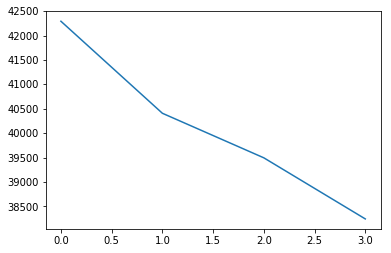

In [41]:
import matplotlib.pyplot as plt
plt.plot(loss)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


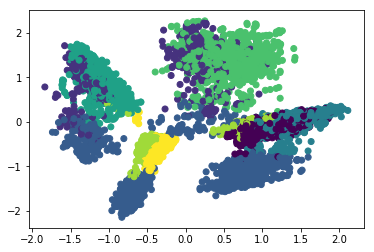

In [42]:
plt.scatter(pca_frq1.iloc[:,0],pca_frq1.iloc[:,1], c= a.iloc[:,2])

In [43]:
data = train.append(test)
data = df_concat([data,pca_frq1.append(pca_frq2)])

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [82]:

#tr,te= data.iloc[:13731,:],data.iloc[13731:,:]
tr,te = trr,tee
tr["Score"] = score


#tr = tr.reset_index()
#te = te.reset_index()
tr.to_feather("../data/input/tr_best_clust.feather")
te.to_feather("../data/input/te_best_clust.feather")
import json
del tr["index"],tr["Score"]
ff = tr.columns.values.tolist()
features = {"features":ff, "target_name":"Score"}

with open("../configs/config_kbest_clust.json","w") as f:
    json.dump(features,f)

In [141]:
import sklearn.base
from  bhtsne import tsne
import numpy as np



# 訓練用データを基準にテストデータも標準化

num_data = np.r_[tr_cate_1, te_cate_1]
y = tsne(num_data,rand_seed=1103,dimensions=3,perplexity=35)



In [8]:
import matplotlib.pyplot as plt
plt.scatter(y[:,0],y[:,2],marker = ".")

NameError: name 'y' is not defined

In [66]:
tr_rf1 = feather.read_dataframe("../features/stack_feature/train_RandomForestRegressor.feather")
tr_rf2 = feather.read_dataframe("../features/stack_feature/train_RandomForestRegressor_2.feather")
tr_et1 = feather.read_dataframe("../features/stack_feature/train_ExtraTreesRegressor.feather")
tr_et2 = feather.read_dataframe("../features/stack_feature/train_ExtraTreesRegressor_2.feather")
tr_mlp = feather.read_dataframe("../features/stack_feature/train_MLPRegressor_2.feather")
tr_knn = feather.read_dataframe("../features/stack_feature/train_KNeighborsRegressor.feather")



In [167]:
te_rf1 = te_rf1.rename(columns={"RandomForestRegressor":"RandomForestRegressor-1"})

In [72]:
tr = pd.DataFrame(tr.values,columns=c[1:7])

In [69]:
tr = df_concat([tr_et1,tr_et2,tr_mlp,tr_rf1,tr_rf2,tr_knn])
#te = df_concat([te_et1,te_et2,te_mlp,te_rf1,te_rf2,te_knn])

In [171]:
data = tr.append(te)

In [173]:
data1 = df_concat([data,pca_f,pca_n])

In [174]:
i = 27463//2
tr,te = data1.iloc[:i,:],data1.iloc[i:,:]
tr["Score"] = score

tr.reset_index(inplace = True)
te.reset_index(inplace = True)
tr.to_feather("../data/input/tr_stack.feather")
te.to_feather("../data/input/te_stack.feather")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
tr_stack = feather.read_dataframe("../data/input/tr_stack.feather")
te_stack = feather.read_dataframe("../data/input/te_stack.feather")

In [46]:
tr_stack = tr_stack.loc[:,:"KNeighborsRegressor"]
te_stack = te_stack.loc[:,:"KNeighborsRegressor"]

In [47]:
tr_mlp1 = feather.read_dataframe("../features/stack_feature/train_MLPRegressor1.feather")
tr_mlp2 = feather.read_dataframe("../features/stack_feature/train_MLPRegressor2.feather")
te_mlp1 = feather.read_dataframe("../features/stack_feature/test_MLPRegressor1.feather")
te_mlp2 = feather.read_dataframe("../features/stack_feature/test_MLPRegressor2.feather")

In [48]:
tr_st = df_concat([tr_stack,tr_mlp1,tr_mlp2])
te_st = df_concat([te_stack,te_mlp1,te_mlp2])

In [79]:
data1 = tr_st.append(te_st)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [80]:
data1 = df_concat([data1,fr_c,fr_i,fr_f])

In [55]:
fr_c = feather.read_dataframe("../features/freqenc_cate.feather")
fr_f = feather.read_dataframe("../features/freqenc_fl.feather")
fr_i = feather.read_dataframe("../features/freqenc_int.feather")

In [53]:
tr = feather.read_dataframe("../data/input/tr_best.feather")
te = feather.read_dataframe("../data/input/te_best.feather")

In [55]:
score = tr["Score"]
del tr["index"],te["index"]

In [61]:
num_tr = df_concat([tr_int,tr_fl])
num_te = df_concat([te_int,te_fl])

In [79]:
from tqdm import tqdm
import statsmodels.api as sm
import multiprocessing as mp
def get_prob(d):
    kde_model = sm.nonparametric.KDEMultivariate(d,var_type="c")
    p = kde_model.pdf(d)
    return p
def prob_encoding(data):
    new = pd.DataFrame()
    with mp.Pool(mp.cpu_count() ) as pool:

        d = data.values.T
        imap = pool.imap(get_prob,d)
        re = list(tqdm(imap,total = len(d)))
    return re


p_tr_int = prob_encoding(tr_int)

100%|██████████| 106/106 [02:52<00:00,  1.24s/it]


In [80]:
p_te_int = prob_encoding(te_int)

100%|██████████| 106/106 [02:31<00:00,  1.18s/it]


In [81]:
p_tr_fl = prob_encoding(tr_fl)
p_te_fl = prob_encoding(te_fl)

100%|██████████| 181/181 [04:18<00:00,  1.15s/it]


In [83]:
p_tr_fl = np.array(p_tr_fl).T
p_te_fl = np.array(p_te_fl).T

In [88]:
p_tr_int.shape

(13731, 106)

In [90]:
p_int = pd.DataFrame(np.r_[p_tr_int, p_te_int], columns=[f"{i}" for i in tr_int.columns])

In [93]:
p_int["col3741"].unique()

array([2.24403520e+00, 6.78460100e-02, 2.97536971e-02, 1.56917588e-01,
       8.96401192e-02, 1.00442417e-02, 1.89513996e-03, 7.58055976e-04,
       3.79027989e-04, 7.58055977e-04, 1.89514012e-04, 1.70125702e-01,
       2.25991303e+00, 9.31093363e-02, 6.57129679e-02, 1.05370648e-02,
       7.66331986e-04, 2.56721215e-02, 3.06532796e-03, 7.66331986e-04,
       3.83166003e-04, 1.91582997e-04, 5.74748990e-04])

In [203]:
for i in p_int_te.columns:
    if p_int_tr[i].unique().sum() >= 1:
        p_int_tr[i] = p_int_tr/p_int_tr[i].sum()

In [145]:
kde_model = sm.nonparametric.KDEMultivariate(tr_int["col463"],var_type="c")
p = kde_model.(tr_int["col463"])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 13731 but corresponding boolean dimension is 1

In [175]:
p_tr_int_["ProbEnc_col3797"]/p_tr_int_["ProbEnc_col3797"].sum()

TypeError: list indices must be integers or slices, not str

In [148]:
from scipy import stats

In [153]:
k = stats.gaussian_kde(tr_int["col3741"])

In [154]:
k.pdf(tr_int["col3741"])

array([2.3785907 , 2.3785907 , 2.3785907 , ..., 2.3785907 , 0.16632659,
       2.3785907 ])

In [176]:
n = pd.DataFrame()
n[1] = k.pdf(p_tr_int["col88"])
n[2] = p_tr_int["col88"]

TypeError: list indices must be integers or slices, not str

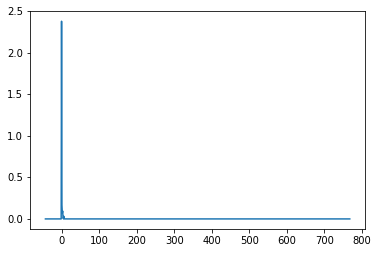

In [169]:
plt.plot(n.sort_values(2)[2],n.sort_values(2)[1])

In [164]:
n[1] = n[1]/sum(n[1])

In [167]:
sum(n[1])

0.9999999999997746

In [313]:
c = []
for i in tr_cate.columns:
    if len(tr_cate[i].unique()) > 30:
        c.append(i)

In [314]:
c

['col9',
 'col609',
 'col1317',
 'col1430',
 'col1975',
 'col2135',
 'col3213',
 'col3289',
 'col3290',
 'col3519',
 'col3591']

In [326]:
a = pd.read_csv("../data/output/submit_0.6159.csv",header = None)

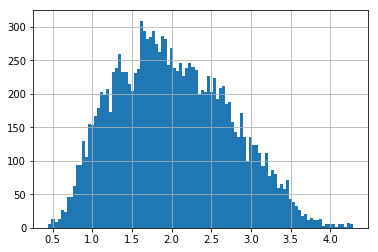

In [327]:
a.iloc[:,1].hist(bins = 100)

In [387]:
int_st = ['sum_Uniq','mean_Uniq', 'std_Uniq', 'var_Uniq', 'min_Uniq', 'max_Uniq','skew_Uniq', 'kurtosis_Uniq', 'sum_Zeros', 'mean_Zeros',
       'median_Zeros', 'skew_Zeros', 'kurtosis_Zeros', 'sum_Neg',
       'skew_Neg', 'kurtosis_Neg', 'sum_Inc', 'mean_Inc', 'median_Inc',
       'skew_Inc', 'kurtosis_Inc', 'mean_float', 'var_float', 'std_float',
       'kurtosis_float']
fl_st = ['mean_float', 'var_float', 'std_float',
       'max_float', 'min_float', 'kurtosis_float', 'skew_float',
       'sum_Uniq', 'mean_Uniq', 'std_Uniq', 'var_Uniq', 'skew_Uniq',
       'kurtosis_Uniq', 'sum_Inc', 'skew_Inc', 'kurtosis_Inc',
       'sum_Zeros', 'skew_Zeros', 'kurtosis_Zeros', 'sum_Neg', 'skew_Neg']
c_st =['sum_Zeros', 'mean_Zeros', 'median_Zeros', 'std_Zeros', 'var_Zeros',
       'skew_Zeros', 'kurtosis_Zeros']

In [388]:
c_stt = [f"cate_{i}" for i in c_st]
FE_c = FE_c[c_st]


In [389]:
FE_c = pd.DataFrame(FE_c.values, columns=c_stt)

In [392]:
st = df_concat([all_st,FE_i,FE_c,FE_f])

NameError: name 'int_c' is not defined

In [84]:
data1.shape

(27463, 494)

In [91]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,log_loss
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge


stdsc = StandardScaler()
y = score
l_tr = stdsc.fit_transform(tr_int)
kf = KFold(n_splits = 5,random_state=1103)
predd = []
for i,(tr_idx,val_idx) in enumerate(kf.split(l_tr)):
    train,valid = (l_tr[tr_idx,:],y[tr_idx]), (l_tr[val_idx,:],y[val_idx])


    #model = ExtraTreesRegressor()
    model = MLPRegressor(hidden_layer_sizes=(100,512,))
    model.fit(train[0],train[1])
    pred = model.predict(valid[0])
    
    print(r2_score(valid[1],pred))
    #print(log_loss(valid[1],pred))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.3408999979515953


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.2700773526429313
-4.660565681410677


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


-0.7071866445354749
-6.164706200062776


In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(512,512,))

In [88]:
np.sum([[1,2,3],[1,2,2]],axis = 0)/3

array([0.66666667, 1.33333333, 1.66666667])

In [90]:
kf = KFold(n_splits = 5,random_state=1103)

NameError: name 'KFold' is not defined

In [95]:
tr_idx= kf.split(l_tr)

In [5]:
fl_= feather.read_dataframe("../features/freqenc_fl.feather")
int_= feather.read_dataframe("../features/freqenc_int.feather")
cate= feather.read_dataframe("../features/freqenc_cate.feather")

In [6]:
del fl_["index"],int_["index"],cate["index"]

In [9]:
frq = df_concat([fl_,int_,cate])

In [12]:
df_concat([train.append(test),np.log1p(frq)])

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ID,col10,col1006,col1008,col1015,col1019,col1027,col1032,col1038,col1039,...,col3637_FreqEnc,col3639_FreqEnc,col3683_FreqEnc,col3689_FreqEnc,col3696_FreqEnc,col3716_FreqEnc,col3736_FreqEnc,col3743_FreqEnc,col3754_FreqEnc,col3768_FreqEnc
0,NaN,34.568,48.0,3.930,0.0,0.0,6.0,0.892,13.879,1.0,...,0.257518,0.406702,0.537897,0.634741,0.642279,0.030553,0.453408,0.276422,0.481697,0.365874
1,NaN,37.527,50.0,1.807,1.0,0.0,4.0,0.842,13.486,0.0,...,0.257518,0.135723,0.028573,0.634741,0.093514,0.580159,0.102626,0.519744,0.481697,0.078546
2,NaN,33.399,49.0,0.000,0.0,1.0,0.0,1.345,12.875,4.0,...,0.534319,0.406702,0.537897,0.634741,0.642279,0.580159,0.453408,0.519744,0.481697,0.365874
3,NaN,33.482,46.0,0.000,0.0,1.0,6.0,0.639,12.806,0.0,...,0.257518,0.406702,0.072807,0.634741,0.642279,0.580159,0.453408,0.276422,0.481697,0.365874
4,NaN,53.268,81.0,3.949,0.0,0.0,3.0,0.967,13.833,24.0,...,0.534319,0.406702,0.537897,0.100652,0.642279,0.580159,0.453408,0.519744,0.481697,0.026590
5,NaN,56.968,81.0,5.534,0.0,1.0,3.0,0.976,13.635,16.0,...,0.534319,0.135723,0.537897,0.634741,0.642279,0.580159,0.453408,0.519744,0.255264,0.365874
6,NaN,41.144,61.0,5.517,1.0,0.0,3.0,0.904,14.524,4.0,...,0.257518,0.263020,0.537897,0.634741,0.642279,0.580159,0.453408,0.519744,0.481697,0.365874
7,NaN,42.759,63.0,1.896,0.0,1.0,2.0,0.569,13.128,14.0,...,0.534319,0.263020,0.537897,0.634741,0.642279,0.580159,0.453408,0.519744,0.481697,0.296383
8,NaN,40.409,57.0,1.171,2.0,1.0,5.0,0.946,14.405,0.0,...,0.534319,0.263020,0.537897,0.634741,0.642279,0.165540,0.265424,0.276422,0.255264,0.078546
9,NaN,40.794,56.0,0.000,0.0,1.0,1.0,0.436,13.526,9.0,...,0.534319,0.406702,0.537897,0.634741,0.642279,0.580159,0.453408,0.519744,0.481697,0.365874


In [34]:
import sklearn.base
from  bhtsne import tsne
import numpy as np



# 訓練用データを基準にテストデータも標準化


y = tsne(frq,rand_seed=1103,dimensions=3,perplexity=30)

In [128]:
import feather
tr_sne.to_feather("../data/input/stack/tr_tSNE.feather")
te_sne.to_feather("../data/input/stack/te_tSNE.feather")

In [41]:
a = pd.DataFrame(y,columns=[f"tSNE_{i}" for i in range(3)])

In [46]:
t,tt = a.iloc[:13731,:],a.iloc[13731:,:]
tr_sne = df_concat([train,t])
te_sne = df_concat([test,tt])

In [127]:
tr_sne["Score"] = score

In [51]:
del tr_sne["Score"]

In [96]:
n = np.r_[tr_int.columns,tr_fl.columns]

In [100]:
a = set(train.columns) - set(n)

In [110]:
data = df_concat([p_int,p_fl,d[list(a)].astype(int),])

In [109]:
d = train.append(test)

set()

In [116]:
tr,te = data.iloc[:data.shape[0]//2,:],data.iloc[data.shape[0]//2:,:]

In [125]:
tr.to_feather("../data/input/tr_kde.feather")
te.to_feather("../data/input/te_kde.feather")

In [120]:
te.reset_index(inplace=True)

In [121]:
del te["index"]

In [70]:
tr = feather.read_dataframe("../data/input/tr_best.feather")
te = feather.read_dataframe("../data/input/te_best.feather")

In [71]:
score = tr["Score"]
del tr["Score"]

In [57]:
import feather
train = feather.read_dataframe("../data/input/train.feather")
test = feather.read_dataframe("../data/input/test.feather")
del train["ID"],test["ID"],train["Score"]
c = [i for i in train.columns.values if train[i].dtypes == int ]
int_data = train[c].append(test[c])
import numpy as np
cate_c = []
for i in int_data.columns:
    a = int_data[i].value_counts().keys().values
    aa = np.arange(min(a),max(a) + 1)
    if len(set(a)) == len(aa):
        cate_c.append(i)
int_train,int_test = train[cate_c],test[cate_c]
#int drop
from tqdm import tqdm
train,test = int_train,int_test
#分散＝０
constant = []
for col in tqdm(train.columns):
    if col != "Score" or col != "ID":
        if train[col].std() == 0:
            constant.append(col)
train1 = train.drop(columns=constant,axis=1)
test1 = test.drop(columns=constant,axis=1)


# カテゴリ minが300以下なら排除
col=[]
for c in tqdm(train1.columns):
    if len(np.unique(train1[c])) == 2:
        if min(train1[c].value_counts()) <= 100:
            col.append(c)
    if train1[c].dtypes == float and len(np.unique(train1[c])) < 3:
        col.append(c)
        
    if train1[c].value_counts().max()/len(train1) > 0.95:
        col.append(c)
train1.drop(col,axis = 1, inplace=True)
test1.drop(col,axis = 1, inplace=True)
            
#ダブり
aa = []
for i in tqdm(train1.columns):
    if train1[i].dtype != "object":
        aa.append(i)
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)
int_train,int_test = train1,test1

100%|██████████| 438/438 [00:00<00:00, 12576.80it/s]


In [58]:
cate_tr = int_train
cate_te = int_test

In [72]:
cate_c = cate_tr.columns

In [77]:
not_in = list(set(cate_c) - set(tr.columns))

In [78]:
trr = df_concat([tr,int_train[not_in],pca_cate1])
tee = df_concat([te,int_test[not_in],pca_cate2])

In [81]:
trr.columns.duplicated().sum()

0

In [84]:
tr_catef

,col9_FreqEnc,col35_FreqEnc,col55_FreqEnc,col63_FreqEnc,col64_FreqEnc,col67_FreqEnc,col81_FreqEnc,col89_FreqEnc,col101_FreqEnc,col112_FreqEnc,...,col3714_FreqEnc,col3716_FreqEnc,col3718_FreqEnc,col3736_FreqEnc,col3743_FreqEnc,col3754_FreqEnc,col3766_FreqEnc,col3768_FreqEnc,col3778_FreqEnc,col3783_FreqEnc
0,0.093948,0.605564,0.920982,0.629670,0.941009,0.859369,0.922511,0.933727,0.160294,0.899497,...,0.93562,0.031025,0.540092,0.573665,0.318404,0.618819,0.891851,0.441774,0.796446,0.908164
1,0.076324,0.605564,0.920982,0.629670,0.941009,0.859369,0.922511,0.933727,0.431942,0.006045,...,0.93562,0.786323,0.260724,0.108077,0.681596,0.618819,0.082368,0.081713,0.796446,0.908164
2,0.090671,0.394436,0.920982,0.629670,0.941009,0.140631,0.922511,0.933727,0.431942,0.899497,...,0.93562,0.786323,0.540092,0.573665,0.681596,0.618819,0.891851,0.441774,0.796446,0.908164
3,0.041876,0.394436,0.920982,0.629670,0.941009,0.140631,0.922511,0.933727,0.431942,0.899497,...,0.93562,0.786323,0.260724,0.573665,0.318404,0.618819,0.891851,0.441774,0.796446,0.908164
4,0.009468,0.605564,0.920982,0.629670,0.941009,0.859369,0.922511,0.933727,0.160294,0.899497,...,0.93562,0.786323,0.135169,0.573665,0.681596,0.618819,0.891851,0.026946,0.796446,0.908164
5,0.022285,0.394436,0.920982,0.629670,0.941009,0.859369,0.073556,0.933727,0.285558,0.899497,...,0.93562,0.786323,0.540092,0.573665,0.681596,0.290802,0.891851,0.441774,0.203554,0.908164
6,0.075013,0.605564,0.920982,0.197873,0.941009,0.859369,0.922511,0.933727,0.431942,0.899497,...,0.93562,0.786323,0.260724,0.573665,0.681596,0.618819,0.891851,0.441774,0.203554,0.073993
7,0.022285,0.394436,0.038380,0.197873,0.941009,0.859369,0.922511,0.933727,0.160294,0.899497,...,0.93562,0.786323,0.135169,0.573665,0.681596,0.618819,0.891851,0.344986,0.796446,0.908164
8,0.022577,0.394436,0.920982,0.629670,0.941009,0.859369,0.922511,0.933727,0.160294,0.899497,...,0.93562,0.180031,0.540092,0.303984,0.318404,0.290802,0.891851,0.081713,0.203554,0.908164
9,0.050907,0.394436,0.920982,0.629670,0.941009,0.859369,0.922511,0.933727,0.285558,0.899497,...,0.93562,0.786323,0.540092,0.573665,0.681596,0.618819,0.891851,0.441774,0.796446,0.908164
